## HW3_hy1528_Assignment2
Author: Haoming Yang

The data is from https://data.cityofnewyork.us/Transportation/Traffic-Volume-Counts-2012-2013-/p424-amsu

In [1]:
from __future__ import print_function

In [2]:
!curl  https://data.cityofnewyork.us/api/views/p424-amsu/rows.csv?accessType=DOWNLOAD > Traffic_Volume_Counts.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  907k    0  907k    0     0   896k      0 --:--:--  0:00:01 --:--:--  896k


In [3]:
import os
print("PUIDATA", os.getenv("PUIDATA"))

PUIDATA /nfshome/hy1528/PUIdata


In [4]:
!mv Traffic_Volume_Counts.csv $PUIDATA

mv: 'Traffic_Volume_Counts.csv' and '/nfshome/hy1528/PUIdata/Traffic_Volume_Counts.csv' are the same file


In [5]:
!ls $PUIDATA

Assignment 2: Read CSV files with pandas and ise NYC open data portal.ipynb
gitesthaoming
Traffic_Volume_Counts.csv


In [6]:
import pandas as pd
dhs = pd.read_csv("%s/Traffic_Volume_Counts.csv"%os.getenv("PUIDATA"))

In [7]:
dhs.head(7)

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/02/2013,106,74,45.0,...,371,398,324,394,379,329,249,197,187,169
1,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/03/2013,109,74,55.0,...,308,291,313,253,242,217,210,144,125,79
2,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/04/2013,36,28,11.0,...,426,425,419,469,425,358,224,185,132,74
3,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/05/2013,42,28,16.0,...,393,479,441,476,446,424,305,219,171,76
4,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/06/2013,35,38,12.0,...,383,384,391,369,401,338,236,186,123,76
5,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/07/2013,33,26,14.0,...,151,409,422,364,356,339,275,225,169,104
6,1,2153,HUGUENOT AVE,WOODROW RD,STAFFORD AVE,NB,02/08/2013,35,28,18.0,...,430,518,461,485,531,393,351,276,242,154


In [8]:
dhs.columns

Index(['ID', 'Segment ID', 'Roadway Name', 'From', 'To', 'Direction', 'Date',
       '12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM',
       '4:00-5:00AM', '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM',
       '8:00-9:00AM', '9:00-10:00AM', '10:00-11:00AM', '11:00-12:00PM',
       '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', '3:00-4:00PM',
       '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM',
       '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM'],
      dtype='object')

In [9]:
dhs_2c=dhs[['8:00-9:00AM','5:00-6:00PM']]

In [10]:
dhs_2c.head(7)

,8:00-9:00AM,5:00-6:00PM
0,213.0,394
1,111.0,253
2,493.0,469
3,499.0,476
4,490.0,369
5,460.0,364
6,440.0,485


In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


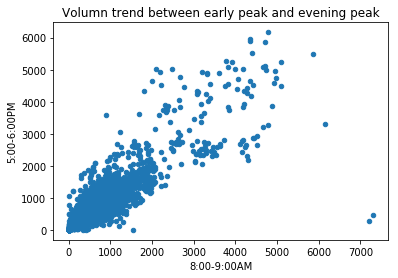

In [12]:
dhs_2c.plot(x="8:00-9:00AM", y="5:00-6:00PM",kind='scatter',title='Volumn trend between early peak and evening peak')

### Figure 1:
Traffic volumn of early peak against evening peak in NYC between 2012-2013. The data was collected by DOT for New York Metropolitan Transportation Council (NYMTC).The figure shows a strong correlation between volumns between 8:00-9:00AM and 5:00-6:00Pm

## Extra Credit Assignment : work with and APIs and dates in Pandas

Using the same dataset but from SODA API

In [13]:
url="https://data.cityofnewyork.us/resource/ry4b-kref.json"

In [14]:
df = pd.read_json(url)

In [15]:
df.head(8)

,_10_00_11_00am,_10_00_11_00pm,_11_00_12_00am,_11_00_12_00pm,_12_00_1_00_am,_12_00_1_00pm,_1_00_2_00am,_1_00_2_00pm,_2_00_3_00am,_2_00_3_00pm,...,_8_00_9_00pm,_9_00_10_00am,_9_00_10_00pm,date,direction,from,id,roadway_name,segment_id,to
0,387,187,169,335,106,406,74,411,45,371,...,249,278,197,2013-02-02,NB,WOODROW RD,1,HUGUENOT AVE,2153,STAFFORD AVE
1,249,125,79,351,109,374,74,350,55,308,...,210,204,144,2013-02-03,NB,WOODROW RD,1,HUGUENOT AVE,2153,STAFFORD AVE
2,282,132,74,307,36,304,28,328,11,426,...,224,263,185,2013-02-04,NB,WOODROW RD,1,HUGUENOT AVE,2153,STAFFORD AVE
3,255,171,76,294,42,310,28,382,16,393,...,305,241,219,2013-02-05,NB,WOODROW RD,1,HUGUENOT AVE,2153,STAFFORD AVE
4,260,123,76,283,35,334,38,324,12,383,...,236,297,186,2013-02-06,NB,WOODROW RD,1,HUGUENOT AVE,2153,STAFFORD AVE
5,215,169,104,263,33,254,26,303,14,151,...,275,273,225,2013-02-07,NB,WOODROW RD,1,HUGUENOT AVE,2153,STAFFORD AVE
6,236,242,154,282,35,343,28,353,18,430,...,351,290,276,2013-02-08,NB,WOODROW RD,1,HUGUENOT AVE,2153,STAFFORD AVE
7,395,191,174,342,110,414,73,419,46,379,...,254,283,201,2013-02-09,NB,WOODROW RD,1,HUGUENOT AVE,2153,STAFFORD AVE


In [16]:
df.columns

Index(['_10_00_11_00am', '_10_00_11_00pm', '_11_00_12_00am', '_11_00_12_00pm',
       '_12_00_1_00_am', '_12_00_1_00pm', '_1_00_2_00am', '_1_00_2_00pm',
       '_2_00_3_00am', '_2_00_3_00pm', '_3_00_4_00am', '_3_00_4_00pm',
       '_4_00_5_00am', '_4_00_5_00pm', '_5_00_6_00am', '_5_00_6_00pm',
       '_6_00_7_00am', '_6_00_7_00pm', '_7_00_8_00am', '_7_00_8_00pm',
       '_8_00_9_00am', '_8_00_9_00pm', '_9_00_10_00am', '_9_00_10_00pm',
       'date', 'direction', 'from', 'id', 'roadway_name', 'segment_id', 'to'],
      dtype='object')

In [17]:
df_2c=df[['_8_00_9_00am','date','_5_00_6_00am']]

In [18]:
df_2c.rename(columns = {'date':'Date', 
               '_8_00_9_00am':'8:00-9:00AM',
                       '_5_00_6_00am':"5:00-6:00PM"}, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [19]:
df_2c["Date"] = df_2c["Date"].apply(lambda x: pd.Timestamp(x))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Text(0,0.5,'Volumn')

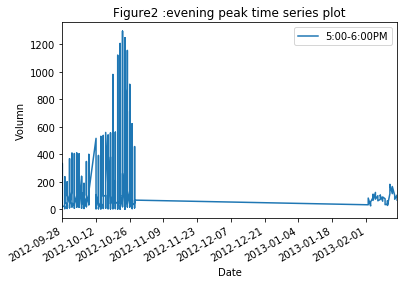

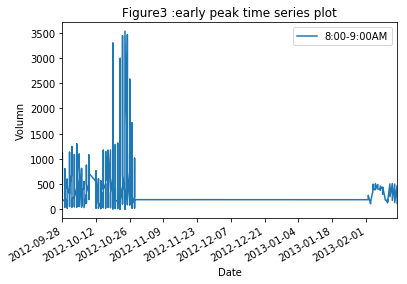

In [20]:
ax1 = df_2c.plot(x='Date', y='5:00-6:00PM',title='Figure2 :evening peak time series plot')
ax1.set_ylabel("Volumn")
ax2 = df_2c.plot(x='Date', y='8:00-9:00AM',title='Figure3 :early peak time series plot')
ax2.set_ylabel("Volumn")

### Figure 2&3:
The traffic volumns of 5-6:00PM and 8-9:00AM seems has the same trend arcoss time. What is noticable is the flat line between around 2012-10-26 to 2013-02-01 showing that both early peak and envening peark are low and did not drift like before. This may be caused by missing value for it is unlikely to see the traffic volumn in a city has this status.